In [1]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [2]:
import requests
import json
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from data_manager import grab_daily_data, get_stock_data, preprocess_data, preprocess_data_multiple

In [3]:
def plot_close_prices(target):
    time_series, stock_prices = get_closing_price(target)
    fig, ax = plt.subplots()
    ax.plot(time_series, stock_prices)

In [16]:
def get_compiled_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(365,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mean_squared_error',
                  metrics=[tf.keras.metrics.MeanSquaredError()],
                  optimizer='adam')
    return model

In [5]:
def train_model(symbol, model, api_key, start=None, end=None):
    if (start is None and end is not None) or (start is not None and end is None):
        raise ValueError("start and end has to be both non-None or both None")
    x = y = []
    if not isinstance(symbol, str):
        x, y = preprocess_data_multiple(symbol, api_key)
    else:
        x, y, time_series = preprocess_data(symbol, api_key, start=start, end=end)
    model.fit(np.asarray(x), np.asarray(y), epochs=30, batch_size=128)
    return model

In [6]:
def predict_and_save(symbol, api_key, model):
    x, y, time_series = preprocess_data(symbol, api_key)
    pred = model.predict(np.asarray(x))
    stock_data = get_stock_data(symbol, api_key)
    plt.plot(pd.to_datetime(stock_data['Dates']), np.array(stock_data['Prices']).astype(float))
    plt.plot(pd.to_datetime(time_series), pred)
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()
    my_dict = {str(time_series[i]): str(pred[i][0]) for i in range(0, len(pred))}
    with open("../data/" + symbol + "_pred.json", "w") as output_file:
        json.dump(my_dict, output_file)

In [17]:
model = get_compiled_model()
train_model('IBM', model, api_key)

Epoch 1/30
43/43 [==============================] - 0s 2ms/step - loss: 4091.2742 - mean_squared_error: 4091.2742
Epoch 2/30
43/43 [==============================] - 0s 2ms/step - loss: 172.0071 - mean_squared_error: 172.0071
Epoch 3/30
43/43 [==============================] - 0s 2ms/step - loss: 114.6106 - mean_squared_error: 114.6106
Epoch 4/30
43/43 [==============================] - 0s 2ms/step - loss: 86.5012 - mean_squared_error: 86.5012
Epoch 5/30
43/43 [==============================] - 0s 2ms/step - loss: 71.9800 - mean_squared_error: 71.9800
Epoch 6/30
43/43 [==============================] - 0s 2ms/step - loss: 65.1885 - mean_squared_error: 65.1885
Epoch 7/30
43/43 [==============================] - 0s 2ms/step - loss: 67.9037 - mean_squared_error: 67.9037
Epoch 8/30
43/43 [==============================] - 0s 2ms/step - loss: 51.4926 - mean_squared_error: 51.4926
Epoch 9/30
43/43 [==============================] - 0s 2ms/step - loss: 55.3776 - mean_squared_error: 55.3776
Ep

169/169 [==============================] - 0s 879us/step


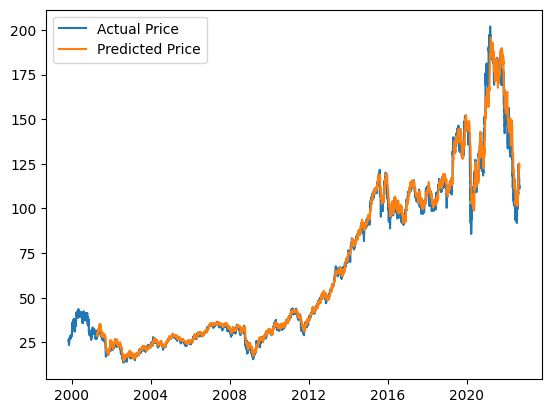

In [19]:
predict_and_save("DIS", api_key, model)